In [135]:
# Import stuffs
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load dataset
digits = datasets.load_digits()

In [142]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [143]:
kNN_train = []
kNN_test = []
kNN_neighbors = []

for i in range (1,9):   
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train, y_train)
    
    kNN_train.append(kNN.score(X_train, y_train))
    kNN_test.append(kNN.score(X_test, y_test))
    kNN_neighbors.append(i)

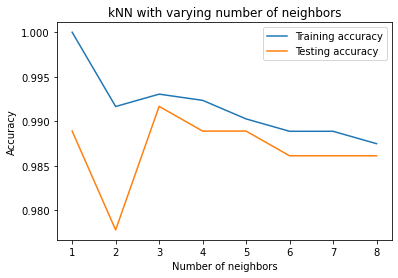

In [145]:
# plotting lines

plt.plot(kNN_neighbors, kNN_train, label = "Training accuracy")
plt.plot(kNN_neighbors, kNN_test, label = "Testing accuracy")

plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('kNN with varying number of neighbors')
plt.legend()
plt.show()

# conclusion: best overall k would be n = 3

In [146]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, y_train)
kNN_test = kNN.score(X_test, y_test)
kNN_test

0.9916666666666667

In [97]:
# next exercise

In [130]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.92      1.00      0.96        33
           2       1.00      1.00      1.00        32
           3       1.00      0.97      0.99        34
           4       0.97      1.00      0.99        36
           5       1.00      0.95      0.97        39
           6       1.00      0.97      0.99        37
           7       1.00      1.00      1.00        40
           8       1.00      0.90      0.95        29
           9       0.93      1.00      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [129]:
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_report = classification_report(y_test, y_pred, output_dict=True)
print(svm_report['accuracy'])

0.9916666666666667


In [103]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        36
           5       1.00      0.97      0.99        39
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        29
           9       0.98      1.00      0.99        40

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



In [104]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.76      0.67      0.71        33
           2       1.00      0.91      0.95        32
           3       1.00      0.91      0.95        34
           4       0.90      0.97      0.93        36
           5       1.00      0.95      0.97        39
           6       1.00      0.92      0.96        37
           7       0.95      0.97      0.96        40
           8       0.76      0.76      0.76        29
           9       0.78      0.97      0.87        40

    accuracy                           0.91       360
   macro avg       0.91      0.90      0.91       360
weighted avg       0.92      0.91      0.91       360



In [105]:
# Conclusion: kernel poly and rbf has the highest accuracy, either those should be used --> I will choose poly

In [106]:
# next exercise

In [156]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
bayes_report = classification_report(y_test, y_pred, output_dict=True)
print(bayes_report['accuracy'])

0.8055555555555556


<AxesSubplot:>

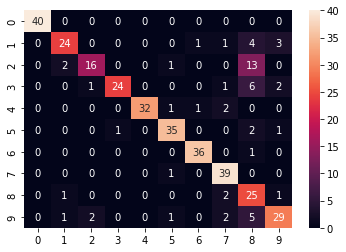

In [109]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)

In [112]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

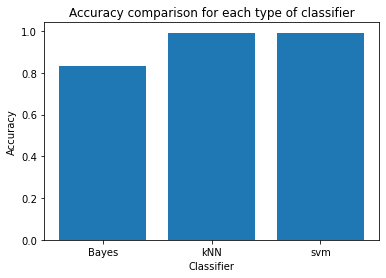

In [154]:
# getting the data from previous calculated accuracy
data = {'Bayes': bayes_report['accuracy'], 'kNN': kNN_test, 'svm': svm_report['accuracy']}

classifier_name = list(data.keys())
classifier_accuracy = list(data.values())

plt.bar(classifier_name, classifier_accuracy)

plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy comparison for each type of classifier")
plt.show()

In [157]:
# regression exercise